# Leading Causes of Death in New York City
#### Although death is the end of a life, it can provide useful information to doctors, researchers, and regular people, like you and me. When a person passes, there are many questions that arise: “who died?”, “why did this person pass?”, “when did he/she pass?”. All of these questions help doctors and researchers do improve their jobs. 
#### Between 2007 to 2014, the government collected hospital records that recorded the leading causes of death in New York City. It recorded the year, leading cause of death, gender, the total number of deaths within the leading cause, death rate, and the adjusted age of the person. 
#### Based on this data, I was curious to see if the death rate in NYC decreased over the years. Of course, there are many factor that contribute to this factor such as: “is healthcare improving?”, “how is technology contributing to wellbeing?”, “Is crime related?” 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

#reading file
death = pd.read_csv('causeofdeath.csv')
%matplotlib inline

In [3]:
# if the cell is '.', change to 0. Found that the data had periods in place of numbers. 
## Rather than removing them, I added zeros based on the other numbers, the categories with periods had low values. 
badvalues = death.loc[:,'Deaths'] =="."
death.loc[badvalues,'Deaths']=0

#this changes the string into floats 
death['Deaths'] = death['Deaths'].astype(str).astype(float)

In [4]:
grouped_df = death.groupby(['Year'])['Deaths'].sum()
grouped_year = death.groupby(['Year'])

Text(0.5,1,'Total Deaths per Year')

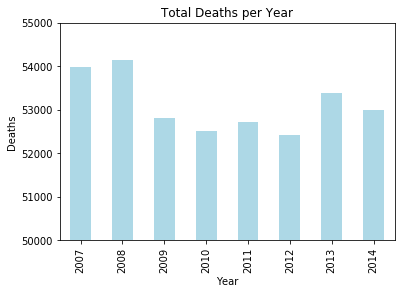

In [5]:
grouped_df.plot.bar(color='lightblue')
plt.ylim([50000, 55000])
plt.ylabel('Deaths')
plt.xlabel('Year')
plt.title('Total Deaths per Year')

### The Top Ten Leading Causes of Death in New York City
Here, I grouped the leading causes of death and found the top ten. 

In [6]:
#List the leading causes of death
death.groupby('Leading Cause')['Deaths'].sum().nlargest(10)

Leading Cause
Diseases of Heart (I00-I09, I11, I13, I20-I51)                      147551.0
Malignant Neoplasms (Cancer: C00-C97)                               106367.0
All Other Causes                                                     77999.0
Influenza (Flu) and Pneumonia (J09-J18)                              18678.0
Diabetes Mellitus (E10-E14)                                          13794.0
Chronic Lower Respiratory Diseases (J40-J47)                         13214.0
Cerebrovascular Disease (Stroke: I60-I69)                            12941.0
Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)      7467.0
Essential Hypertension and Renal Diseases (I10, I12)                  6955.0
Human Immunodeficiency Virus Disease (HIV: B20-B24)                   5436.0
Name: Deaths, dtype: float64

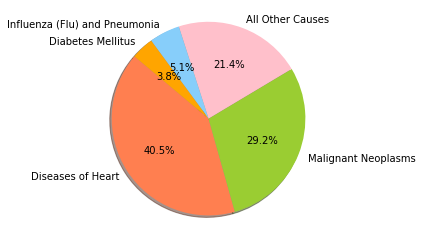

In [37]:
labels = 'Diseases of Heart', 'Malignant Neoplasms', 'All Other Causes', 'Influenza (Flu) and Pneumonia', 'Diabetes Mellitus'
sizes = [147551,106367,77999,18678,13794]
colors = ['coral', 'yellowgreen', 'pink', 'lightskyblue', 'orange']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

## Is there a relationship between genders and the cause of death?

I continued to dig around and wondered if there was a relationship between gender and the leading cause of death. And I found that in some cases there was a relationship. 

In [8]:
df_heart = death[death['Leading Cause'] == 'Diseases of Heart (I00-I09, I11, I13, I20-I51)']
female_heart = df_heart[df_heart['Sex'] == 'F']
male_heart = df_heart[df_heart['Sex'] =='M']
grouped_fyear = female_heart.groupby('Year').sum()
grouped_myear = male_heart.groupby('Year').sum()

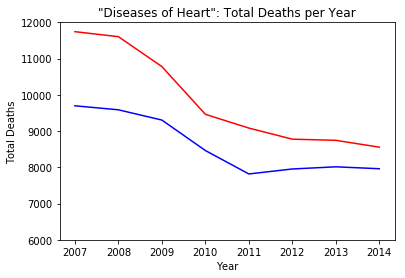

In [9]:
plt.plot(grouped_fyear, color='red')
plt.plot(grouped_myear, color='blue')
plt.ylim([6000, 12000])
plt.ylabel('Total Deaths')
plt.xlabel('Year')
plt.title('"Diseases of Heart": Total Deaths per Year')
plt.show()

In [10]:
print(ttest_ind(female_heart.Deaths, male_heart.Deaths, equal_var=False))

Ttest_indResult(statistic=0.5575475742900142, pvalue=0.5785295265422499)


    -  Between 2007 and 2014, the top leading cause of death was Diseases of the Heart
    -  There were more women who passed away from heart related diseases than men with heart related diseases
    -  The t-test gave a p-value of approximately 0.579. This shows that the two groups BLAH BLAH
    -  Based on what is seen on TV and social media, I was surprised to see that women were more prone to death by heart disease.
 

In [11]:
df_cause = death[death['Leading Cause'] == 'All Other Causes']
female_cause = df_cause[df_cause['Sex'] == 'F']
male_cause = df_cause[df_cause['Sex'] =='M']
grouped_fcyear = female_cause.groupby('Year').sum()
grouped_mcyear = male_cause.groupby('Year').sum()

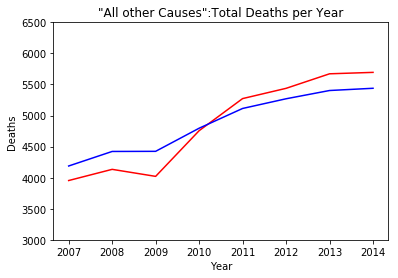

In [12]:
plt.plot(grouped_fcyear, color='red')
plt.plot(grouped_mcyear, color='blue')
plt.ylim([3000, 6500])
plt.ylabel('Deaths')
plt.xlabel('Year')
plt.title('"All other Causes":Total Deaths per Year')
plt.show()

In [13]:
print(ttest_ind(female_cause.Deaths, male_cause.Deaths, equal_var=False))

Ttest_indResult(statistic=-0.01469235763597845, pvalue=0.9883089155050527)


    -  The third largest category was "All other causes". 
    -  It's difficult to conclude any solid information based on this graph and data because due to the lack of information of the cause of death. 
    -  However, the t-test provided a large p-value of 0.988. This indicates that the two groups were very different. 
    -  Future researchs can look into exactly what these "other causes". Why is it that a category as specific as "Mental And Behavorial Disorders due to Use of Alcohol" get its own section, but all other causes of death are lumped into one?


In [14]:
df_allharm = death[death['Leading Cause'] == 'Intentional Self-Harm (Suicide: X60-X84, Y87.0)']
female_harm = df_allharm[df_allharm['Sex'] == 'F']
male_harm = df_allharm[df_allharm['Sex'] =='M']
grouped_fgender = female_harm.groupby('Year').sum()
grouped_mgender = male_harm.groupby('Year').sum()
ratio = (grouped_fgender/grouped_mgender)
ratio.mean()

Deaths    0.094606
dtype: float64

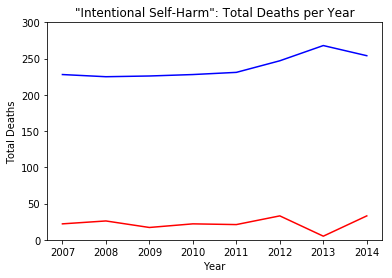

In [15]:
plt.plot(grouped_fgender, color='red')
plt.plot(grouped_mgender, color='blue')
plt.ylim([0, 300])
plt.ylabel('Total Deaths')
plt.xlabel('Year')
plt.title('"Intentional Self-Harm": Total Deaths per Year')
plt.show()

In [16]:
print(ttest_ind(female_harm.Deaths, male_harm.Deaths, equal_var=False))

Ttest_indResult(statistic=-3.528645096327783, pvalue=0.001515509481350614)


    -  I found this graph to be interesting due to the large difference within genders
    -  Approximately for every woman, 9 men harm themselves. 
    -  I expected more woman to harms themselves than men due to how women are often depicted in movies, tv shows, and in media. 
    -  The t-test provided a p-value of 0.0015, which is very low. This means that the two groups were similar. 


### Lastly, I was curious as to what the numeric values were for cancer. Has the deaths related to cancer gone down? 

In [17]:
df_cancer = death[death['Leading Cause'] == 'Malignant Neoplasms (Cancer: C00-C97)']
female_cancer = df_cancer[df_cancer['Sex'] == 'F']
male_cancer = df_cancer[df_cancer['Sex'] =='M']
grouped_fgender = female_cancer.groupby('Year').sum()
grouped_mgender = male_cancer.groupby('Year').sum()

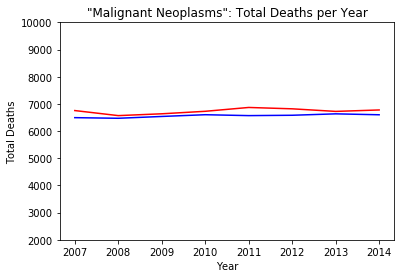

In [18]:
plt.plot(grouped_fgender, color='red')
plt.plot(grouped_mgender, color='blue')
plt.ylim([2000, 10000])
plt.ylabel('Total Deaths')
plt.xlabel('Year')
plt.title('"Malignant Neoplasms": Total Deaths per Year')
plt.show()


With all these graphs, it is important to consider certain factors. For example, how many women and men passed away within these seven years? Were there more women? Or were there more men? If there were more women, it would make more sense for there to be more women dying of diseases of the heart than men.

However, based on the numbers below, the number of female deaths and male deaths were very close.

In [19]:
#death.groupby('Sex')['Deaths'].describe()
female = death[death['Sex']=='F']
male = death[death['Sex']=='M']

print(ttest_ind(female_cancer.Deaths, male_cancer.Deaths, equal_var=False))

Ttest_indResult(statistic=0.12289643756932313, pvalue=0.9024522214224311)


This t-test shows us that there's a significant difference between the two genders.

In [20]:
grouped_gender = death.groupby(['Sex'])['Deaths'].sum()
grouped_gender.describe()

count         2.000000
mean     212499.000000
std        6465.784407
min      207927.000000
25%      210213.000000
50%      212499.000000
75%      214785.000000
max      217071.000000
Name: Deaths, dtype: float64

In [22]:
asian=death[death['Race Ethnicity']=="Asian and Pacific Islander"]
black=death[death['Race Ethnicity']=="Black Non-Hispanic"]
hispanic=death[death['Race Ethnicity']=="Hispanic"]
unknown=death[death['Race Ethnicity']=="Not Stated/Unknown"]
other=death[death['Race Ethnicity']=="Other Race/ Ethnicity"]
white=death[death['Race Ethnicity']=="White Non-Hispanic"]

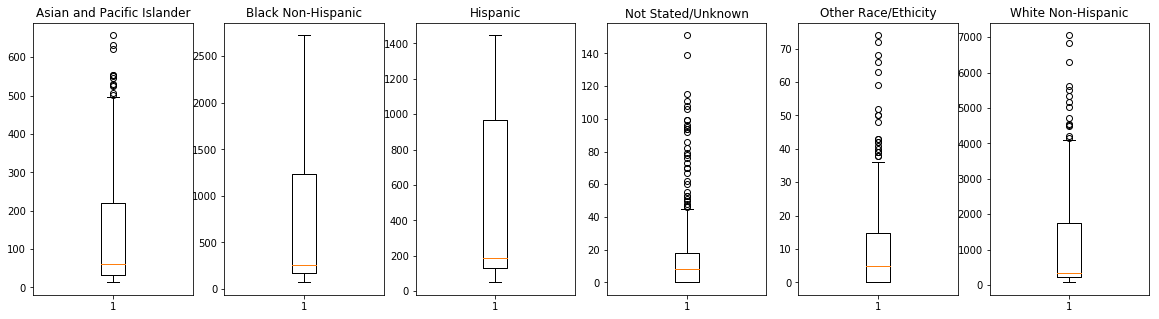

In [23]:
plt.figure(figsize=(20, 5))


plt.subplot(1, 6, 1)
plt.boxplot(asian['Deaths'])
plt.title('Asian and Pacific Islander')

plt.subplot(1,6, 2)
plt.boxplot(black['Deaths'])
plt.title('Black Non-Hispanic')

plt.subplot(1,6, 3)
plt.boxplot(hispanic['Deaths'])
plt.title('Hispanic')

plt.subplot(1,6, 4)
plt.boxplot(unknown['Deaths'])
plt.title('Not Stated/Unknown')

plt.subplot(1,6, 5)
plt.boxplot(other['Deaths'])
plt.title('Other Race/Ethicity')

plt.subplot(1,6, 6)
plt.boxplot(white['Deaths'])
plt.title('White Non-Hispanic')


plt.show()


I broke down the data by Race Ethnicity. I was curious to see how diverse the population was in terms of race. The box plots show us the different outliers within each race. 

## Future Studies
#### There are a lot unanswered questions in this dataset. And I'm interested in learning more about the following topics:
    -  Different categories within "All other causes"
    -  What defines a disease of the heart? Why isn't there diseases of the liver or lungs?
    -  The reason behind self-harm. Is there one reason that sticks out? 
    -  How does race play a role within all this data
 